# Business Analysis

### We want to increase satisfaction , but need to define a single metric that we want to focus on

### New KPI is Satisfaction Ratio = Satisfaction / (Satisfaction +Neutral or NO Satisfaction )

### We have created plots to show how this ratio changes with distribution of most important features below

### Do note that the goal is to Maximise the Satisfaction Ratio

### Customer satisfaction is of utmost importance for airlines for several reasons:

1.	Customer Loyalty: Airlines want to build a loyal customer base who choose to fly with them repeatedly. Customers who are satisfied with their experience are more likely to choose the same airline in the future, leading to increased revenue for the airline.

2.	Reputation: Airlines rely heavily on their reputation, which is built on the experiences of their customers. Satisfied customers are more likely to spread positive word-of-mouth, leading to more customers and a better reputation. On the other hand, dissatisfied customers can harm the airline's reputation, leading to a decrease in business.

3.	Competitive Advantage: Airlines operate in a highly competitive industry, and customer satisfaction is one of the key factors that sets them apart from their competitors. Airlines that prioritize customer satisfaction can gain a competitive advantage, attracting more customers and generating more revenue.

4.	Revenue: Satisfied customers are more likely to spend more money on ancillary products and services offered by the airline, such as seat upgrades, in-flight meals, and baggage fees. In addition, they are more likely to return for future flights, leading to increased revenue for the airline.

5.	Compliance: Airlines are subject to a variety of regulations and standards, including safety regulations and customer service standards. Meeting these standards is important for compliance, and satisfied customers are more likely to report positive feedback to regulatory authorities.

##### In summary, customer satisfaction is critical for the success of airlines, helping to build customer loyalty, improve reputation, gain a competitive advantage, increase revenue, and meet compliance standards.


In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import math as math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
#df = pd.read_csv("/Users/dreama.wmy/Documents/McGill/INSY_695_ML/final_project/Train.csv")

url = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Airline-Passenger-Satisfaction-Prediction/main/Data/train.csv'
pd.set_option('display.max_columns', None) # Show all the columns
df = pd.read_csv(url, index_col=0)


#### Cleaning column names

In [3]:
#Cleaning column names
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

# Getting a quick look at Attributes

In [5]:
list_column_values(df,3,'False')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
satisfaction              ==> ['neutral or dissatisfied', 'satisfied']


In [6]:
list_column_values(df,15,'True')

**Results:**

id                        ==> more than 15 values
Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Age                       ==> more than 15 values
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
Flight_Distance           ==> more than 15 values
Inflight_wifi_service     ==> [0, 1, 2, 3, 4, 5]
Departure/Arrival_time_convenient ==> [0, 1, 2, 3, 4, 5]
Ease_of_Online_booking    ==> [0, 1, 2, 3, 4, 5]
Gate_location             ==> [0, 1, 2, 3, 4, 5]
Food_and_drink            ==> [0, 1, 2, 3, 4, 5]
Online_boarding           ==> [0, 1, 2, 3, 4, 5]
Seat_comfort              ==> [0, 1, 2, 3, 4, 5]
Inflight_entertainment    ==> [0, 1, 2, 3, 4, 5]
On-board_service          ==> [0, 1, 2, 3, 4, 5]
Leg_room_service          ==> [0, 1, 2, 3, 4, 5]
Baggage_handling          ==> [1, 2, 3, 4, 5]
Checkin_service           ==> [0, 1, 2, 3, 4, 5]
Infligh

# Check missing values


In [7]:
df.isnull().sum().sort_values(ascending=False)


Arrival_Delay_in_Minutes             310
id                                     0
Gender                                 0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On-board_service                       0
Inflight_entertainment                 0
Seat_comfort                           0
Online_boarding                        0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure/Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
Customer_Type                          0
satisfaction                           0
dtype: int64

# Exploring Target Variable

In [8]:
#Target variable
unique_values = df['satisfaction'].unique()
unique_values

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

# Change Target categories into Binary

In [9]:
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

In [10]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [11]:
# Check Correlations

<AxesSubplot:>

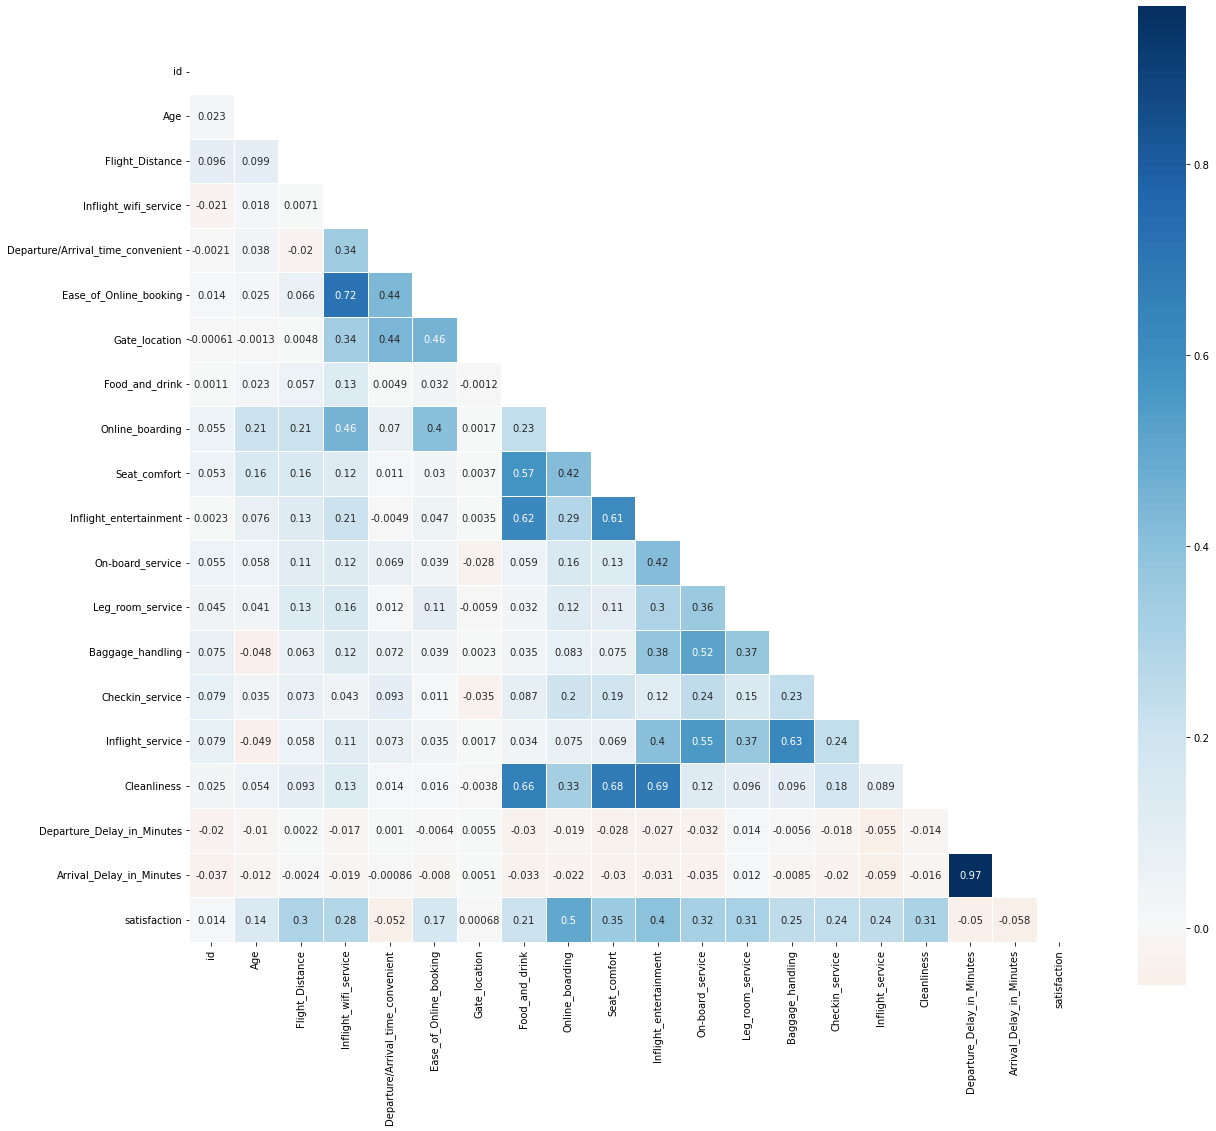

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Plotting Density Distribution

C:\Users\workV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\workV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\workV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

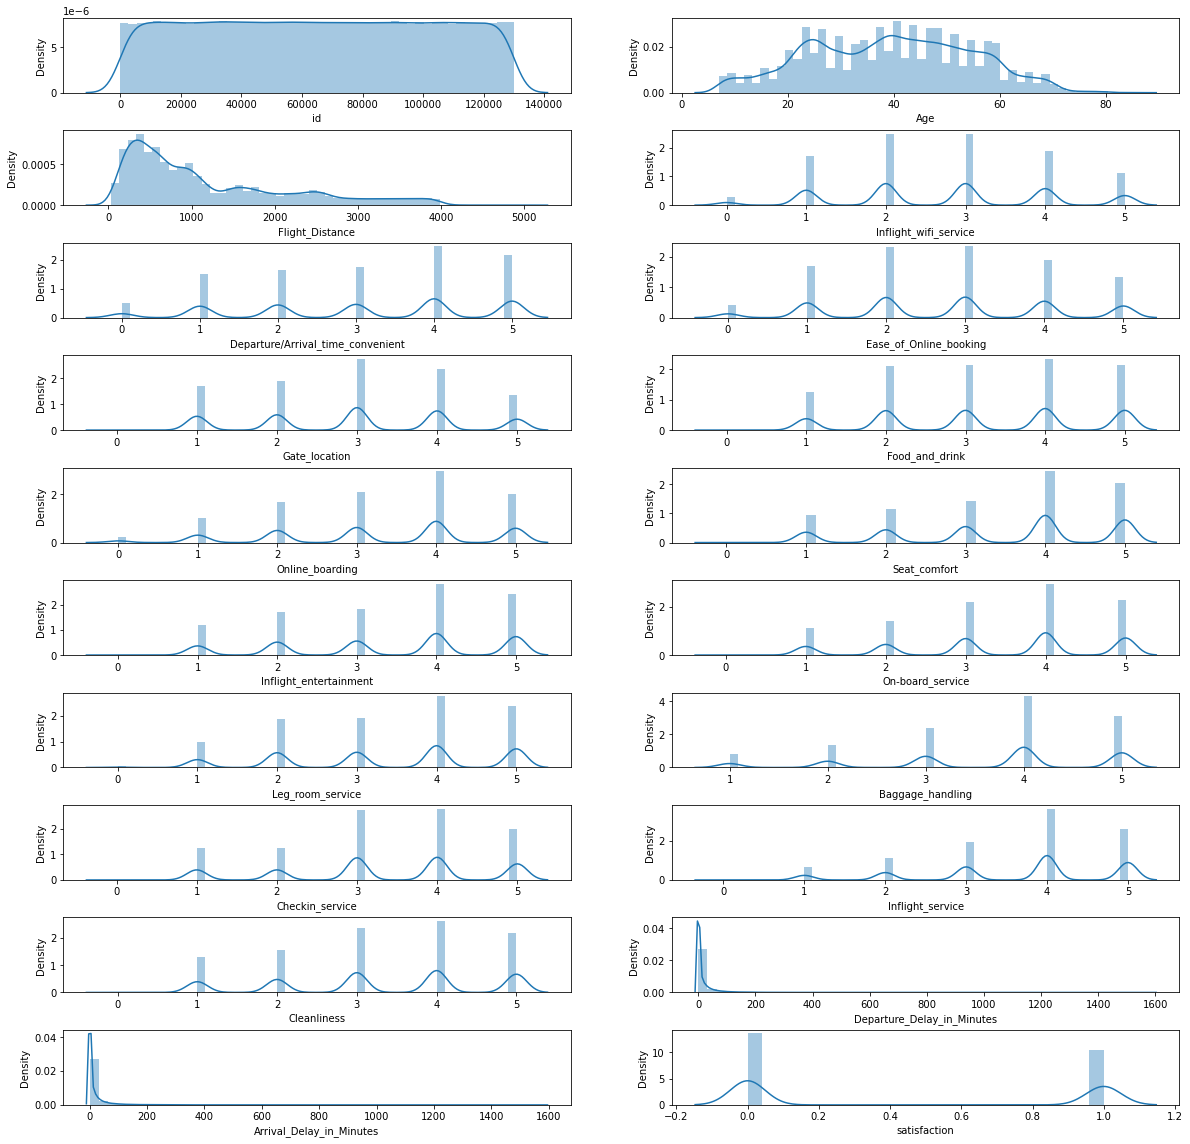

In [13]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])
plot_numerical_columns(df)

## Exploring categorical variables

In [14]:
cat_var = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
num_var = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

In [15]:
for c in cat_var:
    print("{} \n".format(df[c].value_counts()))

Female    52727
Male      51177
Name: Gender, dtype: int64 

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64 

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64 

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 



In [16]:
def plot_with_sat(var):
    plt.subplots(figsize = (8,5))
    u = sns.countplot(x = var, hue = 'satisfaction', palette = "Blues", data = df)


def level_plot(var):
    fig, axarr= plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(x = var, hue = 'satisfaction', palette = "Blues", data = df, ax = axarr[0])
    table = pd.crosstab(df['satisfaction'], df[var])
    sns.heatmap(table, cmap='Blues', ax = axarr[1])

In [17]:
# create formula to calcuate the dissatisfied rate based on a variable
# method modified from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s. 
#credit to Data Science With Chris. 
def table (var, highlight = True): 
    
    df_pivot = pd.pivot_table(
        df[[ 'id',var, "satisfaction"]],
        index = [var], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [var, 0, 1]
    
    df_pivot["Total"] = df_pivot[1]+df_pivot[0]
    df_pivot["Dissatisfied Rate"] = round(df_pivot[0]/df_pivot["Total"]*100,2).astype(str)


    if highlight == True: 
        df_pivot = df_pivot.style.highlight_max(subset = "Dissatisfied Rate", color = "lightblue" )
    else: 
        df_pivot = df_pivot
        
    return df_pivot

# Relation between Flight Distance and Satisfaction

Text(0.5, 1.0, 'Flight Distance VS Satisfaction')

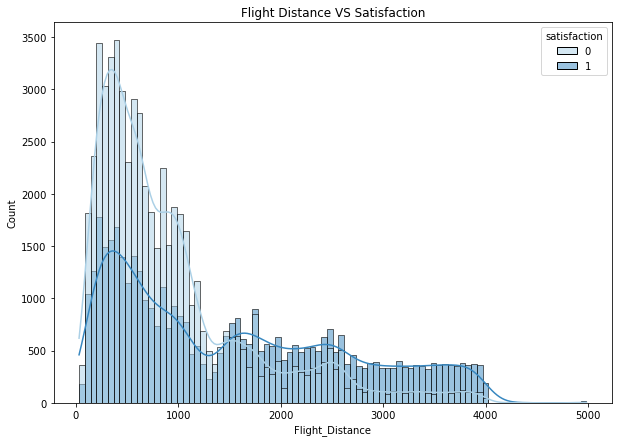

In [18]:
plt.subplots(figsize = (10,7))
sns.histplot(x='Flight_Distance',hue="satisfaction",data=df,kde=True,palette="Blues")
plt.title("Flight Distance VS Satisfaction")

# Relation between Flight Distance and Satisfaction Ratio

In [24]:
dfS=df[['Flight_Distance','satisfaction']]
dfS['Nosatisfaction'] = dfS['satisfaction'].apply(lambda x: 1 if x in [0] else 0)
dfS1=dfS.groupby(['Flight_Distance']).sum()
dfS1.reset_index(inplace=True)
dfS1['SatifactionRation']=dfS1['satisfaction']/(dfS1['satisfaction']+dfS1['Nosatisfaction'])
dfS2=dfS1.head(3000)

C:\Users\workV\AppData\Local\Temp\ipykernel_17724\1207791821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['Nosatisfaction'] = dfS['satisfaction'].apply(lambda x: 1 if x in [0] else 0)


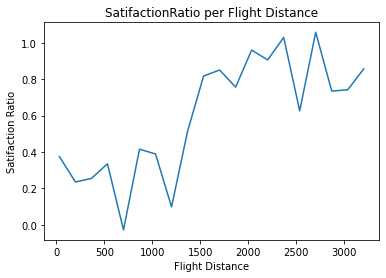

In [25]:
x = np.array(dfS2['Flight_Distance'])
y = np.array(dfS2['SatifactionRation'])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("SatifactionRatio per Flight Distance")
plt.xlabel("Flight Distance")
plt.ylabel("Satifaction Ratio")
plt.show()

### We can see that satisfaction ratio is lower in low distance flights so our maximum focus should be on them

# Relation between Inflight_wifi_service and Satisfaction 

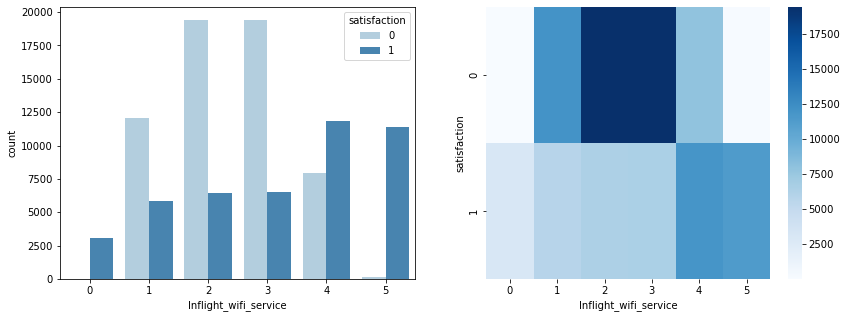

In [26]:
level_plot('Inflight_wifi_service')

# Relation between Inflight_wifi_service and Satisfaction Ratio

In [27]:
dfW=df[['Inflight_wifi_service','satisfaction']]
dfW['Nosatisfaction'] = dfW['satisfaction'].apply(lambda x: 1 if x in [0] else 0)
dfW1=dfW.groupby(['Inflight_wifi_service']).sum()
dfW1.reset_index(inplace=True)
dfW1['SatifactionRation']=dfW1['satisfaction']/(dfW1['satisfaction']+dfW1['Nosatisfaction'])
dfW2=dfW1.tail(-1)

C:\Users\workV\AppData\Local\Temp\ipykernel_17724\1920463194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfW['Nosatisfaction'] = dfW['satisfaction'].apply(lambda x: 1 if x in [0] else 0)


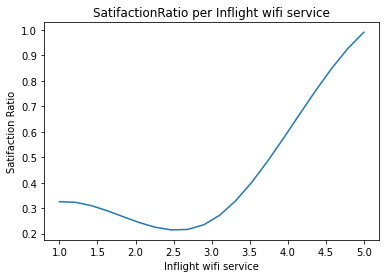

In [28]:
x = np.array(dfW2['Inflight_wifi_service'])
y = np.array(dfW2['SatifactionRation'])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("SatifactionRatio per Inflight wifi service")
plt.xlabel("Inflight wifi service")
plt.ylabel("Satifaction Ratio")
plt.show()

### We see that satisfaction ratio increase with better wifi service , therefore we should focus towards providing better wifi service

# Relation between Departure Delay and Satisfaction 

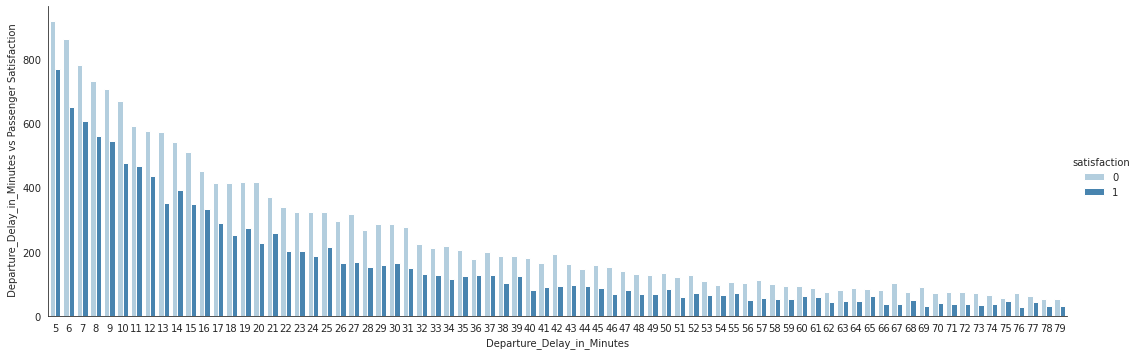

In [30]:
with sns.axes_style('white'):
    g = sns.catplot(data=df,  x="Departure_Delay_in_Minutes", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels(' Departure_Delay_in_Minutes vs Passenger Satisfaction')

# Relation between Departure Delay and Satisfaction Ratio 

In [31]:
df2=df[['Departure_Delay_in_Minutes','satisfaction']]
df2['Nosatisfaction'] = df2['satisfaction'].apply(lambda x: 1 if x in [0] else 0)
df3=df2.groupby(['Departure_Delay_in_Minutes']).sum()
df3.reset_index(inplace=True)
df3['SatifactionRation']=df3['satisfaction']/(df3['satisfaction']+df3['Nosatisfaction'])
df4=df3.head(100)

C:\Users\workV\AppData\Local\Temp\ipykernel_17724\3577267667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nosatisfaction'] = df2['satisfaction'].apply(lambda x: 1 if x in [0] else 0)


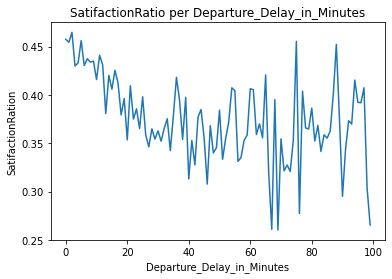

In [32]:
plt.plot(df4['Departure_Delay_in_Minutes'], df4['SatifactionRation'])
plt.xlabel("Departure_Delay_in_Minutes")
plt.ylabel("SatifactionRation")
plt.title("SatifactionRatio per Departure_Delay_in_Minutes")
plt.show()

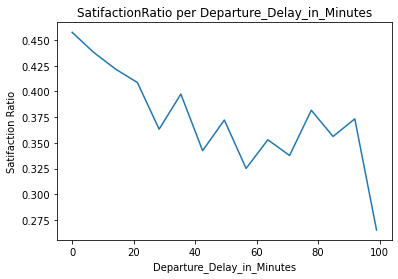

In [33]:
x = np.array(df4['Departure_Delay_in_Minutes'])
y = np.array(df4['SatifactionRation'])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 15)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("SatifactionRatio per Departure_Delay_in_Minutes")
plt.xlabel("Departure_Delay_in_Minutes")
plt.ylabel("Satifaction Ratio")
plt.show()

### We can see that satifaction ratio is decreasing as departure delay increase, we should try to decrease the delay

# Relation between Arrival_Delay_in_Minutes and Satisfaction

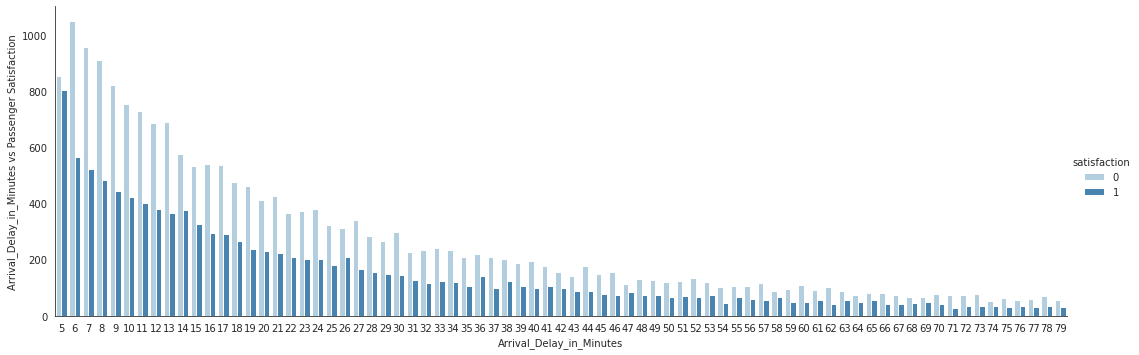

In [34]:
with sns.axes_style('white'):
    g = sns.catplot(data=df,  x="Arrival_Delay_in_Minutes", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Arrival_Delay_in_Minutes vs Passenger Satisfaction')

# Relation between Arrival_Delay_in_Minutes and Satisfaction Ratio

In [35]:
df2=df[['Arrival_Delay_in_Minutes','satisfaction']]
df2['Nosatisfaction'] = df2['satisfaction'].apply(lambda x: 1 if x in [0] else 0)
df3=df2.groupby(['Arrival_Delay_in_Minutes']).sum()
df3.reset_index(inplace=True)
df3['SatifactionRation']=df3['satisfaction']/(df3['satisfaction']+df3['Nosatisfaction'])
df4=df3.head(100)

C:\Users\workV\AppData\Local\Temp\ipykernel_17724\2440595913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nosatisfaction'] = df2['satisfaction'].apply(lambda x: 1 if x in [0] else 0)


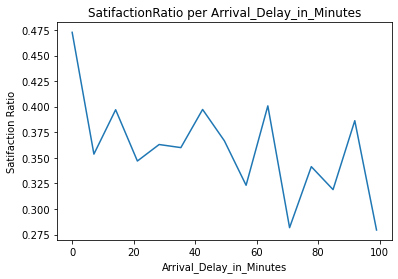

In [36]:
x = np.array(df4['Arrival_Delay_in_Minutes'])
y = np.array(df4['SatifactionRation'])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 15)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("SatifactionRatio per Arrival_Delay_in_Minutes")
plt.xlabel("Arrival_Delay_in_Minutes")
plt.ylabel("Satifaction Ratio")
plt.show()

### We can see that satifaction ratio is decreasing as arrival delay increase, we should try to decrease the delay


# Relation between Age and Satisfaction 

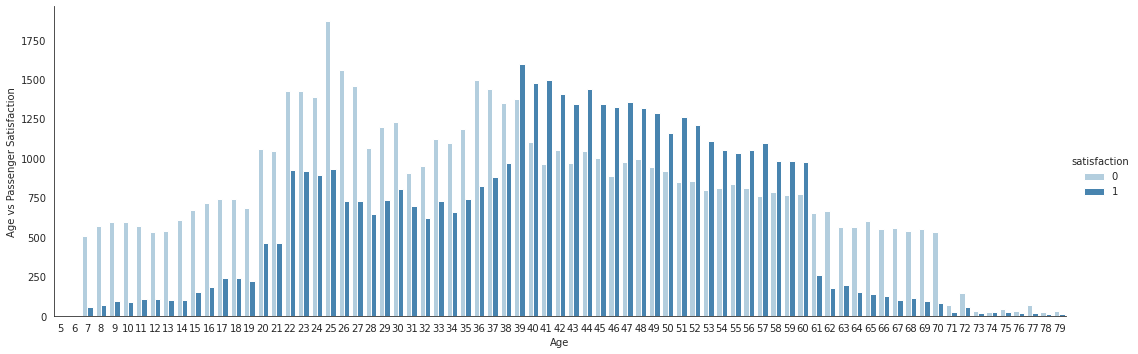

In [37]:
with sns.axes_style('white'):
    g = sns.catplot(data=df, x="Age", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Age vs Passenger Satisfaction')

# Relation between Age and Satisfaction Ratio

C:\Users\workV\AppData\Local\Temp\ipykernel_17724\3664238215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['Nosatisfaction'] = dfS['satisfaction'].apply(lambda x: 1 if x in [0] else 0)


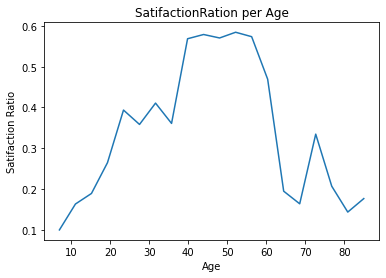

In [38]:
dfS=df[['Age','satisfaction']]
dfS['Nosatisfaction'] = dfS['satisfaction'].apply(lambda x: 1 if x in [0] else 0)
dfS1=dfS.groupby(['Age']).sum()
dfS1.reset_index(inplace=True)
dfS1['SatifactionRation']=dfS1['satisfaction']/(dfS1['satisfaction']+dfS1['Nosatisfaction'])
dfS2=dfS1.head(3000)
x = np.array(dfS2['Age'])
y = np.array(dfS2['SatifactionRation'])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("SatifactionRation per Age")
plt.xlabel("Age")
plt.ylabel("Satifaction Ratio")
plt.show()

## Satisfaction ratio is usually good for people in middle age , we may focus on younger and older generation